In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
import category_encoders as ce
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('dataset_final.csv')

In [3]:
model_collection = []

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
X = df.drop('Target',axis=1)
y = df.Target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model_collection.append(('original batch',model.fit(X_train,y_train),model.score(X_train,y_train),model.score(X_test,y_test)))


In [11]:
y_pred = model.predict(X_test)

In [12]:
model.score(X_test,y_test)

0.5094339622641509

In [13]:
print((confusion_matrix(y_test,y_pred)))

[[27  1]
 [25  0]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67        28
           1       0.00      0.00      0.00        25

    accuracy                           0.51        53
   macro avg       0.26      0.48      0.34        53
weighted avg       0.27      0.51      0.36        53



In [15]:
model = NuSVC(probability=True)

In [16]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [17]:
model_collection.append(('original batch NuSVC',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))

In [18]:
y_pred = model.predict(X_test)

In [19]:
model.score(X_test,y_test)

0.5283018867924528

In [20]:
print((confusion_matrix(y_test,y_pred)))

[[12 16]
 [ 9 16]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.50      0.64      0.56        25

    accuracy                           0.53        53
   macro avg       0.54      0.53      0.53        53
weighted avg       0.54      0.53      0.52        53



- Repeat for dataset of rotated images

In [22]:
df = pd.read_csv('dataset_final_rotated.csv')

In [23]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
X = df.drop('Target',axis=1)
y = df.Target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
model.score(X_test,y_test)

0.5094339622641509

In [31]:
print((confusion_matrix(y_test,y_pred)))

[[27  0]
 [26  0]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        27
           1       0.00      0.00      0.00        26

    accuracy                           0.51        53
   macro avg       0.25      0.50      0.34        53
weighted avg       0.26      0.51      0.34        53



In [33]:
model = NuSVC(probability=True)

In [34]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [35]:
model_collection.append(('rotated batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [36]:
y_pred = model.predict(X_test)

In [37]:
model.score(X_test,y_test)

0.49056603773584906

In [38]:
print((confusion_matrix(y_test,y_pred)))

[[17 10]
 [17  9]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56        27
           1       0.47      0.35      0.40        26

    accuracy                           0.49        53
   macro avg       0.49      0.49      0.48        53
weighted avg       0.49      0.49      0.48        53



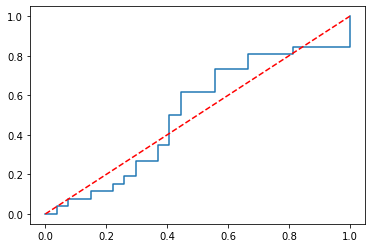

In [40]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- We load the dataset that includes age and sex for each image

In [41]:
df = pd.read_csv('df_agesex.csv')

In [42]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,56,F,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51,M,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,62,F,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,F,1
258,121,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,44,F,1
259,122,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,37,M,1
260,123,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,46,F,1


In [43]:
import seaborn as sns

In [44]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [45]:
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

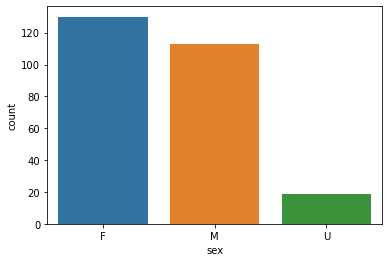

In [46]:
sns.countplot(data=df, x='sex')

In [47]:
df['age'].value_counts()

999    29
46     12
41     12
54     11
49     10
40     10
45      8
43      8
66      8
61      8
56      7
64      7
53      6
55      6
30      6
32      6
59      6
57      5
36      5
52      5
44      5
34      5
42      4
29      4
38      4
35      4
47      4
69      4
62      4
51      4
31      3
70      3
33      3
65      3
60      3
58      3
50      3
39      2
63      2
37      2
67      2
48      2
72      2
73      2
28      2
24      2
22      1
21      1
75      1
23      1
25      1
12      1
Name: age, dtype: int64

In [48]:
len(df[(df['age'] == 999) | (df['sex'] == 'U')]) / len(df)

0.11450381679389313

- since the percentage is moderatly low, we drop rows with unknown sex and age

In [49]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

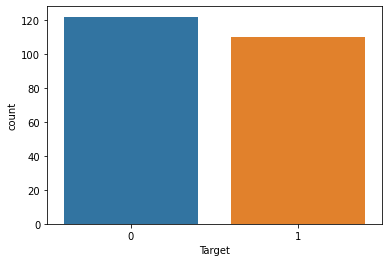

In [50]:
sns.countplot(data=df,x='Target')

- Target variable is still pretty balanced

- We proceed to encode sex feature

In [51]:
encoder = ce.BinaryEncoder()

In [52]:
encoder.fit_transform(df['sex'])

,sex_0,sex_1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
257,0,1
258,0,1
259,1,0
260,0,1


In [53]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [54]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [55]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
model = NuSVC(probability=True)

In [58]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [59]:
model_collection.append(('sex-age original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [60]:
y_pred = model.predict(X_test)

In [61]:
model.score(X_test,y_test)

0.5106382978723404

In [62]:
print((confusion_matrix(y_test,y_pred)))

[[12 11]
 [12 12]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        23
           1       0.52      0.50      0.51        24

    accuracy                           0.51        47
   macro avg       0.51      0.51      0.51        47
weighted avg       0.51      0.51      0.51        47



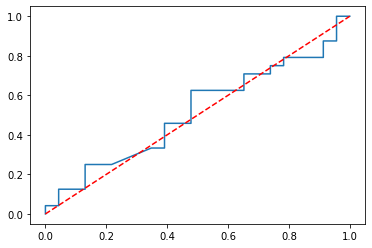

In [64]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- Model for cropped images

In [65]:
df = pd.read_csv('df_cropped.csv')

In [66]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [67]:
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [68]:
df_origin = df.copy()

In [69]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [70]:
encoder = ce.BinaryEncoder()

In [71]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [72]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [73]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [75]:
model = NuSVC(probability=True)

In [76]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [77]:
model_collection.append(('cropped original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [78]:
y_pred = model.predict(X_test)

In [79]:
model.score(X_test,y_test)

0.5957446808510638

In [80]:
print((confusion_matrix(y_test,y_pred)))

[[16 10]
 [ 9 12]]


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63        26
           1       0.55      0.57      0.56        21

    accuracy                           0.60        47
   macro avg       0.59      0.59      0.59        47
weighted avg       0.60      0.60      0.60        47



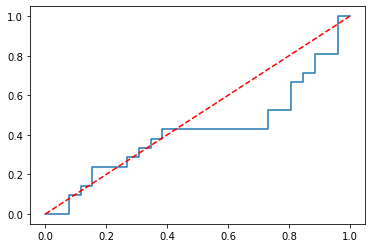

In [82]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- model for cropped images without age and sex features

In [83]:
X = df.drop(['Target','sex','sex_0','sex_1','age'],axis=1)
y = df.Target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [85]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [86]:
model_collection.append(('cropped no sex-age original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [87]:
y_pred = model.predict(X_test)

In [88]:
model.score(X_test,y_test)

0.44680851063829785

In [89]:
print((confusion_matrix(y_test,y_pred)))

[[11 15]
 [11 10]]


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46        26
           1       0.40      0.48      0.43        21

    accuracy                           0.45        47
   macro avg       0.45      0.45      0.45        47
weighted avg       0.46      0.45      0.45        47



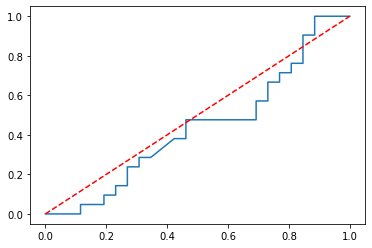

In [91]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- cropped images not including age and sex, and without dropping rows

In [92]:
X = df_origin.drop(['Target','sex','age'],axis=1)
y = df_origin.Target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [94]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [95]:
model_collection.append(('cropped NO age-sex full row original batch',
                         model.fit(X_train,y_train),
                         model.score(X_train,y_train),
                         model.score(X_test,y_test)
                         ))

In [96]:
y_pred = model.predict(X_test)

In [97]:
model.score(X_train,y_train)

0.9617224880382775

In [98]:
model.score(X_test,y_test)

0.5660377358490566

In [99]:
print((confusion_matrix(y_test,y_pred)))

[[21  7]
 [16  9]]


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        28
           1       0.56      0.36      0.44        25

    accuracy                           0.57        53
   macro avg       0.57      0.55      0.54        53
weighted avg       0.57      0.57      0.55        53



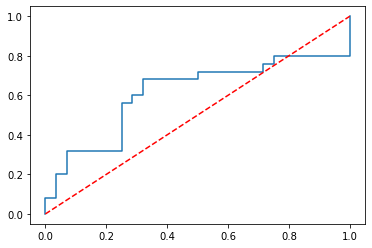

In [101]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- Added new batch of xrays

In [102]:
df = pd.read_csv('df_cropped_2.csv')

In [103]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [104]:
df_origin = df.copy()

In [105]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [106]:
encoder = ce.BinaryEncoder()

In [107]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [108]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [109]:
X = df.drop(['Target','sex','age'],axis=1)
y = df.Target

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [111]:
y_train

22     0
118    0
362    1
129    0
376    1
      ..
155    0
66     0
185    0
93     0
222    1
Name: Target, Length: 284, dtype: int64

In [112]:
model = NuSVC(probability=True)

In [113]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [114]:
model_collection.append(('cropped new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [115]:
y_pred = model.predict(X_test)

In [116]:
model.score(X_test,y_test)

0.6197183098591549

In [117]:
print((confusion_matrix(y_test,y_pred)))

[[17 15]
 [12 27]]


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        32
           1       0.64      0.69      0.67        39

    accuracy                           0.62        71
   macro avg       0.61      0.61      0.61        71
weighted avg       0.62      0.62      0.62        71



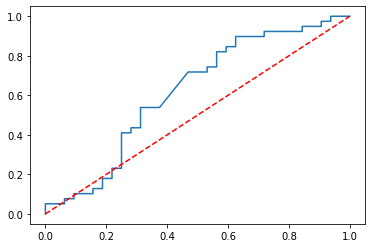

In [119]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- model for cropped images without age and sex features

In [120]:
X = df.drop(['Target','sex','age','sex_0','sex_1'],axis=1)
y = df.Target

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [122]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [123]:
model_collection.append(('cropped NO age-sex new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [124]:
y_pred = model.predict(X_test)

In [125]:
model.score(X_train,y_train)

0.9683098591549296

In [126]:
model.score(X_test,y_test)

0.4788732394366197

In [127]:
print((confusion_matrix(y_test,y_pred)))

[[13 20]
 [17 21]]


In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.39      0.41        33
           1       0.51      0.55      0.53        38

    accuracy                           0.48        71
   macro avg       0.47      0.47      0.47        71
weighted avg       0.48      0.48      0.48        71



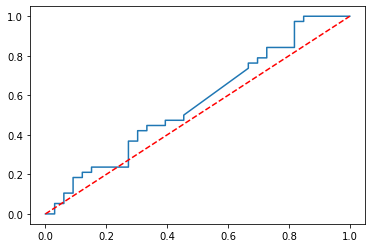

In [129]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- cropped images not including age and sex, and without dropping rows

In [130]:
X = df_origin.drop(['Target','sex','age'],axis=1)
y = df_origin.Target

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [132]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [133]:
model_collection.append(('cropped NO age-sex full rows new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [134]:
y_pred = model.predict(X_test)

In [135]:
model.score(X_train,y_train)

0.9644012944983819

In [136]:
model.score(X_test,y_test)

0.5512820512820513

In [137]:
print((confusion_matrix(y_test,y_pred)))

[[20 21]
 [14 23]]


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53        41
           1       0.52      0.62      0.57        37

    accuracy                           0.55        78
   macro avg       0.56      0.55      0.55        78
weighted avg       0.56      0.55      0.55        78



- separated by sex

In [139]:
df_f = df_origin[df_origin.sex=='F']
df_m = df_origin[df_origin.sex=='M']

In [140]:
X = df_f.drop(['Target','sex','age'],axis=1)
y = df_f.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('female dataframe new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)


In [141]:
model.score(X_train,y_train)

0.9802631578947368

In [142]:
model.score(X_test,y_test)

0.5789473684210527

In [143]:
print((confusion_matrix(y_test,y_pred)))

[[12  4]
 [12 10]]


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        16
           1       0.71      0.45      0.56        22

    accuracy                           0.58        38
   macro avg       0.61      0.60      0.58        38
weighted avg       0.62      0.58      0.57        38



In [145]:
p = model.predict_proba(X_test)

In [146]:
fpr, tpr, th = roc_curve(y_test, p[:,1])

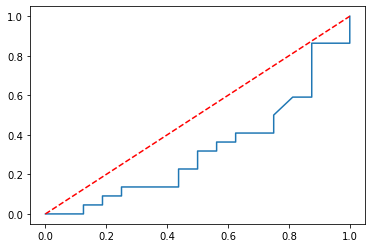

In [147]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [148]:
auc(fpr, tpr)

0.3210227272727273

In [149]:
X = df_m.drop(['Target','sex','age'],axis=1)
y = df_m.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('male dataframe new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [150]:
model.score(X_train,y_train)

0.9785714285714285

In [151]:
model.score(X_test,y_test)

0.6388888888888888

In [152]:
print((confusion_matrix(y_test,y_pred)))

[[12  7]
 [ 6 11]]


In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.61      0.65      0.63        17

    accuracy                           0.64        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.64      0.64      0.64        36



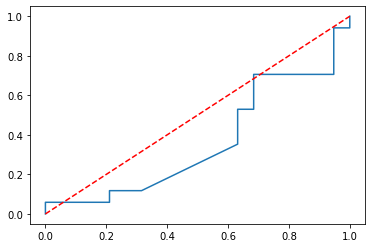

In [154]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [155]:
auc(fpr, tpr)

0.3622291021671827

- separated by sex and including age

In [156]:
df_f.drop(df_f[df_f.age == 999].index,axis=0,inplace=True)

In [157]:
df_m.drop(df_m[df_m.age == 999].index,axis=0,inplace=True)

In [158]:
X = df_f.drop(['Target','sex','age'],axis=1)
y = df_f.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('female dataframe age new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [159]:
model.score(X_train,y_train)

0.9662162162162162

In [160]:
model.score(X_test,y_test)

0.4864864864864865

In [161]:
print((confusion_matrix(y_test,y_pred)))

[[ 9 12]
 [ 7  9]]


In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.43      0.49        21
           1       0.43      0.56      0.49        16

    accuracy                           0.49        37
   macro avg       0.50      0.50      0.49        37
weighted avg       0.50      0.49      0.49        37



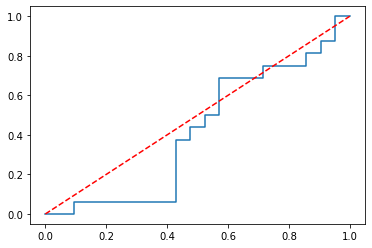

In [163]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [164]:
X = df_m.drop(['Target','sex','age'],axis=1)
y = df_m.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('male dataframe age new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [165]:
model.score(X_train,y_train)

0.9632352941176471

In [166]:
model.score(X_test,y_test)

0.5

In [167]:
print((confusion_matrix(y_test,y_pred)))

[[10  5]
 [12  7]]


In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.67      0.54        15
           1       0.58      0.37      0.45        19

    accuracy                           0.50        34
   macro avg       0.52      0.52      0.50        34
weighted avg       0.53      0.50      0.49        34



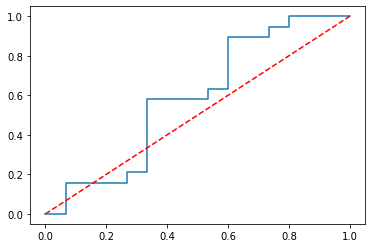

In [169]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- uncensored dataframe

In [170]:
df = pd.read_csv('df_unCens.csv')

In [171]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56,F,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.52,58,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,45,M,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.06,59,M,0
4,4,0.00,0.00,0.01,0.05,0.02,0.01,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,55,F,0


In [172]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [173]:
df_origin = df.copy()

In [174]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [175]:
encoder = ce.BinaryEncoder()

In [176]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [177]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [178]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [180]:
model = RandomForestClassifier(criterion='gini',n_estimators=200)

In [181]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [182]:
model_collection.append(('uncens agesex full batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [183]:
y_pred = model.predict(X_test)

In [184]:
model.score(X_train,y_train)

1.0

In [185]:
model.score(X_test,y_test)

0.5774647887323944

In [186]:
print((confusion_matrix(y_test,y_pred)))

[[18  4]
 [26 23]]


In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.82      0.55        22
           1       0.85      0.47      0.61        49

    accuracy                           0.58        71
   macro avg       0.63      0.64      0.58        71
weighted avg       0.71      0.58      0.59        71



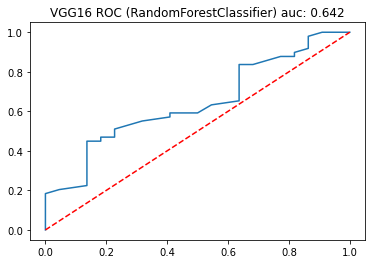

In [188]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG16 ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg16.png')

In [189]:
model = GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

In [190]:
model_collection.append(('uncens rotated boost agesex vgg16',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [191]:
y_pred = model.predict(X_test)

In [192]:
model.score(X_train,y_train)

1.0

In [193]:
model.score(X_test,y_test)

0.5070422535211268

In [194]:
print((confusion_matrix(y_test,y_pred)))

[[16  6]
 [29 20]]


In [195]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.73      0.48        22
           1       0.77      0.41      0.53        49

    accuracy                           0.51        71
   macro avg       0.56      0.57      0.51        71
weighted avg       0.64      0.51      0.52        71



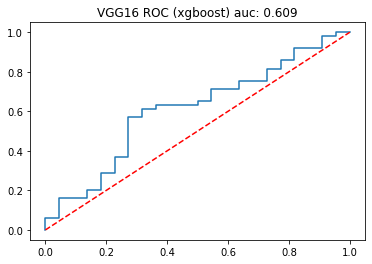

In [196]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG16 ROC (xgboost) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_Xgboost_vgg16.png')

In [197]:
auc(fpr, tpr)

0.6094619666048238

In [198]:
df = pd.read_csv('df_rotated_unCens.csv')

In [199]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42,F,0
1,1,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,M,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,999,U,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49,F,0


In [200]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [201]:
df_origin = df.copy()

In [202]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [203]:
encoder = ce.BinaryEncoder()

In [204]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [205]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [206]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [208]:
model = NuSVC(probability=True)

In [209]:
model.fit(X_train, y_train)

NuSVC(probability=True)

In [210]:
model_collection.append(('uncens rotated agesex full batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [211]:
y_pred = model.predict(X_test)

In [212]:
model.score(X_train,y_train)

0.545774647887324

In [213]:
model.score(X_test,y_test)

0.647887323943662

In [214]:
print((confusion_matrix(y_test,y_pred)))

[[23 12]
 [13 23]]


In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        35
           1       0.66      0.64      0.65        36

    accuracy                           0.65        71
   macro avg       0.65      0.65      0.65        71
weighted avg       0.65      0.65      0.65        71



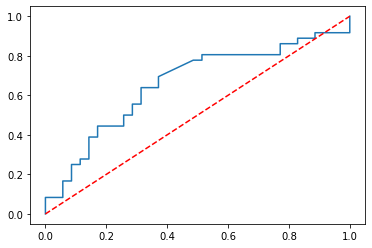

In [216]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [217]:
from sklearn.preprocessing import KBinsDiscretizer

In [218]:
kdisc = KBinsDiscretizer(n_bins=7, encode='ordinal')

In [219]:
df['age_bin'] = kdisc.fit_transform(df[['age']])

In [220]:
df.age_bin

0     2.00
1     5.00
2     2.00
4     3.00
5     4.00
      ... 
382   3.00
383   6.00
384   5.00
385   1.00
386   4.00
Name: age_bin, Length: 355, dtype: float64

In [221]:
X = df.drop(['Target','sex','age'],axis=1)
y = df.Target

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [223]:
model = NuSVC(probability=True)

In [224]:
model.fit(X_train, y_train)

NuSVC(probability=True)

In [225]:
model_collection.append(('uncens rotated discretized age full batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [226]:
y_pred = model.predict(X_test)

In [227]:
model.score(X_train,y_train)

0.9330985915492958

In [228]:
model.score(X_test,y_test)

0.5774647887323944

In [229]:
print((confusion_matrix(y_test,y_pred)))

[[20 16]
 [14 21]]


In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57        36
           1       0.57      0.60      0.58        35

    accuracy                           0.58        71
   macro avg       0.58      0.58      0.58        71
weighted avg       0.58      0.58      0.58        71



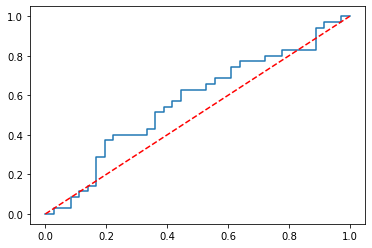

In [231]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [232]:
df = pd.read_csv('df_rotated_unCens_vgg19.csv')

In [233]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42,F,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,M,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,999,U,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49,F,0


In [234]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [235]:
df_origin = df.copy()

In [236]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [237]:
encoder = ce.BinaryEncoder()

In [238]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [239]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [240]:
kdisc = KBinsDiscretizer(n_bins=7, encode='ordinal')

In [241]:
df['age_bin'] = kdisc.fit_transform(df[['age']])

In [242]:
X = df.drop(['Target','sex','age','age_bin','sex_0','sex_1'],axis=1)
y = df.Target

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [244]:
model = RandomForestClassifier(criterion='gini',n_estimators=200)

In [245]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [246]:
pickle.dump(model, file=open('../final_model.sav', 'wb'))

<IPython.core.display.Javascript object>

In [247]:
model_collection.append(('uncens rotated agesex vgg19',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [248]:
y_pred = model.predict(X_test)

In [249]:
model.score(X_train,y_train)

1.0

In [250]:
model.score(X_test,y_test)

0.8873239436619719

In [251]:
print((confusion_matrix(y_test,y_pred)))

[[30  5]
 [ 3 33]]


In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.87      0.92      0.89        36

    accuracy                           0.89        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.89      0.89      0.89        71



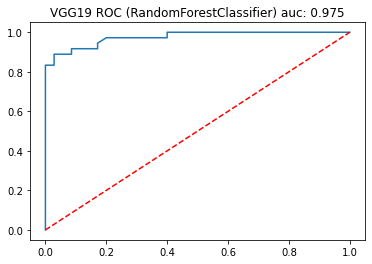

In [253]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg19.png')

In [254]:
auc(fpr, tpr)

0.975

- Testing with new data

In [255]:
prueba_arr = pickle.load(open('/Users/cnieto/IronHack/Personal_projects/PR_Final_PeriapicalRadiography_Classification/Image_preprocessing/real_test.txt','rb'))

<IPython.core.display.Javascript object>

In [256]:
df_prueba = pd.DataFrame(
    columns= range(0,len(prueba_arr[0][0])),
    index= range(0,len(prueba_arr)))

In [257]:
pos = -1
for i in prueba_arr:
    for j in i:
        col = 0
        pos += 1
        for z in j:
            df_prueba.iloc[pos,col] = z
            col += 1 

In [258]:
df_prueba.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10


In [259]:
df_prueba.loc[0,500]

5.0581457e-06

In [260]:
model.predict(df_prueba)

array([0, 0, 0, 0, 0, 0])

In [261]:
model = GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

In [262]:
model_collection.append(('uncens rotated boost agesex vgg19',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [263]:
y_pred = model.predict(X_test)

In [264]:
model.score(X_train,y_train)

1.0

In [265]:
model.score(X_test,y_test)

0.8732394366197183

In [266]:
print((confusion_matrix(y_test,y_pred)))

[[29  6]
 [ 3 33]]


In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.85      0.92      0.88        36

    accuracy                           0.87        71
   macro avg       0.88      0.87      0.87        71
weighted avg       0.88      0.87      0.87        71



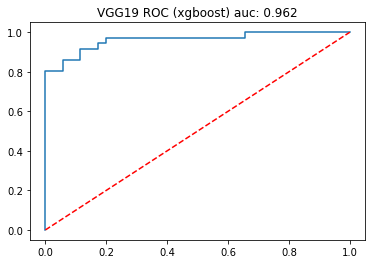

In [268]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 ROC (xgboost) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_Xgboost_vgg19.png')

In [269]:
auc(fpr, tpr)

0.9619047619047619

- Testing with new data

In [270]:
prueba_arr = pickle.load(open('/Users/cnieto/IronHack/Personal_projects/PR_Final_PeriapicalRadiography_Classification/Image_preprocessing/real_test.txt','rb'))

<IPython.core.display.Javascript object>

In [271]:
df_prueba = pd.DataFrame(
    columns= range(0,len(prueba_arr[0][0])),
    index= range(0,len(prueba_arr)))

In [272]:
pos = -1
for i in prueba_arr:
    for j in i:
        col = 0
        pos += 1
        for z in j:
            df_prueba.iloc[pos,col] = z
            col += 1 

In [273]:
df_prueba.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10


In [274]:
df_prueba.loc[0,500]

5.0581457e-06

In [275]:
model.predict(df_prueba)

array([0, 0, 0, 0, 0, 0])

- Preselected images with vgg19

In [276]:
df = pd.read_csv('dataset_selected.csv')

In [277]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [278]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [279]:
X = df.drop(['Target'],axis=1)
y = df.Target

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle=True)

In [281]:
model = RandomForestClassifier(n_estimators=200)

In [282]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [283]:
pickle.dump(model, file=open('../selected_model.sav', 'wb'))

<IPython.core.display.Javascript object>

In [284]:
model_collection.append(('selected vgg19',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [285]:
y_pred = model.predict(X_test)

In [286]:
model.score(X_train,y_train)

1.0

In [287]:
model.score(X_test,y_test)

0.5952380952380952

In [288]:
print((confusion_matrix(y_test,y_pred)))

[[20  5]
 [12  5]]


In [289]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        25
           1       0.50      0.29      0.37        17

    accuracy                           0.60        42
   macro avg       0.56      0.55      0.54        42
weighted avg       0.57      0.60      0.57        42



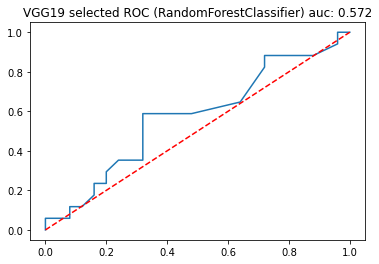

In [290]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_selected_vgg19.png')

In [291]:
auc(fpr, tpr)

0.571764705882353

In [292]:
model.predict(df_prueba)

array([0, 0, 0, 1, 0, 0])

In [293]:
models_df = pd.DataFrame(
    columns= ['name','model','train score','test score'],
    index= range(0,len(model_collection)))

In [294]:
pos = 0
for i in model_collection:
    models_df.loc[pos,'name'] = i[0]
    models_df.loc[pos,'model'] = i[1]
    models_df.loc[pos,'train score'] = i[2]
    models_df.loc[pos,'test score'] = i[3]
    pos += 1

- preselected VGG19 age and sex

In [295]:
df = pd.read_csv('dataset_selected_as.csv')

In [296]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62,M,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49,F,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,52,M,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16,F,0


In [297]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

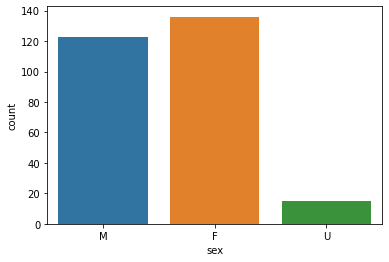

In [298]:
sns.countplot(data=df, x='sex')

<AxesSubplot:xlabel='Target', ylabel='count'>

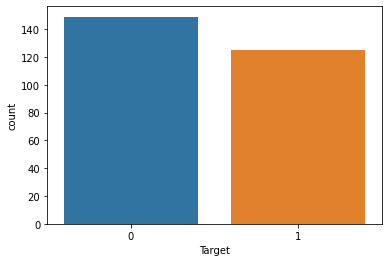

In [299]:
sns.countplot(data=df,x='Target')

In [300]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [301]:
encoder = ce.BinaryEncoder()

In [302]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [303]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [304]:
kdisc = KBinsDiscretizer(n_bins=5, encode='ordinal')

In [305]:
df['age_bin'] = kdisc.fit_transform(df[['age']])

In [306]:
X = df.drop(['Target','sex','age'],axis=1)
y = df.Target

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle=True)

In [308]:
model = RandomForestClassifier(criterion='gini',n_estimators=200)

In [309]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [310]:
model_collection.append(('selected vgg19 age-sex',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [311]:
model.score(X_train,y_train)

1.0

In [312]:
model.score(X_test,y_test)

0.358974358974359

In [313]:
y_pred = model.predict(X_test)

In [314]:
print((confusion_matrix(y_test,y_pred)))

[[10  7]
 [18  4]]


In [315]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.59      0.44        17
           1       0.36      0.18      0.24        22

    accuracy                           0.36        39
   macro avg       0.36      0.39      0.34        39
weighted avg       0.36      0.36      0.33        39



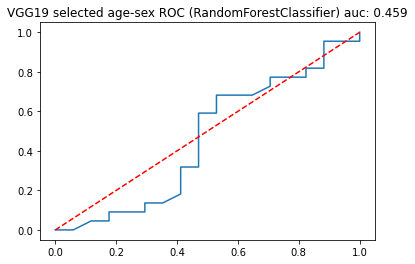

In [316]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected age-sex ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg19_selected_as.png')

In [317]:
model = GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

In [318]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.025, n_estimators=250)

In [319]:
model_collection.append(('selected vgg19 boost age-sex',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [320]:
model.score(X_train,y_train)

1.0

In [321]:
model.score(X_test,y_test)

0.4358974358974359

In [322]:
y_pred = model.predict(X_test)

In [323]:
print((confusion_matrix(y_test,y_pred)))

[[11  6]
 [16  6]]


In [324]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.65      0.50        17
           1       0.50      0.27      0.35        22

    accuracy                           0.44        39
   macro avg       0.45      0.46      0.43        39
weighted avg       0.46      0.44      0.42        39



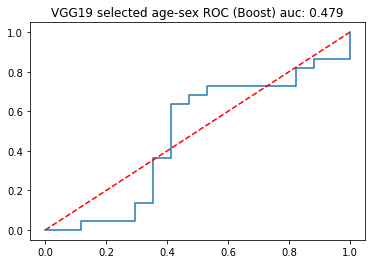

In [325]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected age-sex ROC (Boost) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_Boost_vgg19_selected_as.png')

In [326]:
model = AdaBoostClassifier(n_estimators=350,learning_rate=0.02)

In [327]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=350)

In [328]:
model_collection.append(('selected vgg19 ada age-sex',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [329]:
model.score(X_train,y_train)

0.9023255813953488

In [330]:
model.score(X_test,y_test)

0.48717948717948717

In [331]:
y_pred = model.predict(X_test)

In [332]:
print((confusion_matrix(y_test,y_pred)))

[[11  6]
 [14  8]]


In [333]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.65      0.52        17
           1       0.57      0.36      0.44        22

    accuracy                           0.49        39
   macro avg       0.51      0.51      0.48        39
weighted avg       0.51      0.49      0.48        39



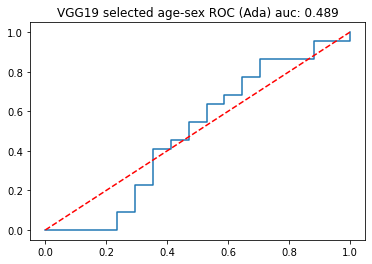

In [334]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected age-sex ROC (Ada) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_Ada_vgg19_selected_as.png')

In [335]:
prueba_arr = pickle.load(open('/Users/cnieto/IronHack/Personal_projects/PR_Final_PeriapicalRadiography_Classification/Image_preprocessing/real_test_as.txt','rb'))

<IPython.core.display.Javascript object>

In [336]:
df_prueba = pd.DataFrame(
    columns= range(0,len(prueba_arr[0])),
    index= range(0,len(prueba_arr)))

In [337]:
pos = -1
for i in prueba_arr:
    pos += 1
    col = 0
    for j in i:
        df_prueba.iloc[pos,col] = j
        col += 1 

In [338]:
df_prueba.rename(columns={1000:'age', 1001:'sex'},inplace=True)

In [339]:
df_prueba['sex_0'] = encoder.fit_transform(df_prueba['sex'])['sex_0']

In [340]:
df_prueba['sex_1'] = encoder.fit_transform(df_prueba['sex'])['sex_1']

In [341]:
kdisc = KBinsDiscretizer(n_bins=5, encode='ordinal')

In [342]:
df_prueba['age_bin'] = kdisc.fit_transform(df_prueba[['age']])

In [343]:
df_prueba.head(1)

,0,1,2,3,4,5,6,7,8,9,...,995,996,997,998,999,age,sex,sex_0,sex_1,age_bin
0,1.2879717e-05,6.426821e-05,0.00027629806,0.00029183418,0.00026865868,6.950337e-05,5.8473448e-05,3.188092e-05,5.464804e-06,5.97443e-05,...,7.443195e-05,9.8862045e-05,1.95752e-05,0.00016579687,0.0010350418,58,M,0,1,3.00


In [344]:
model.predict(df_prueba.drop(['sex','age'],axis=1))

array([1, 0, 0, 1, 1, 0])

- preselected VGG19 only sex

In [345]:
X = df.drop(['Target','sex','age','age_bin'],axis=1)
y = df.Target

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,shuffle=True)

In [347]:
model = RandomForestClassifier(criterion='gini',n_estimators=250)

In [348]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [349]:
model_collection.append(('selected vgg19 sex',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [350]:
model.score(X_train,y_train)

1.0

In [351]:
model.score(X_test,y_test)

0.41025641025641024

In [352]:
y_pred = model.predict(X_test)

In [353]:
print((confusion_matrix(y_test,y_pred)))

[[12 11]
 [12  4]]


In [354]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        23
           1       0.27      0.25      0.26        16

    accuracy                           0.41        39
   macro avg       0.38      0.39      0.38        39
weighted avg       0.40      0.41      0.41        39



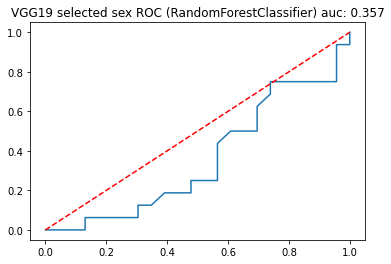

In [355]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected sex ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg19_selected_sex.png')

In [356]:
model.predict(df_prueba.drop(['sex','age','age_bin'],axis=1))

array([0, 0, 0, 0, 1, 0])

- VGG19 selected separated by sex

In [357]:
df_m = df[df.sex == 'M']

In [358]:
X = df_m.drop(['Target','sex','age','sex_0','sex_1'],axis=1)
y = df_m.Target

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [360]:
model = RandomForestClassifier(criterion='gini',n_estimators=350)

In [361]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350)

In [362]:
model_collection.append(('selected vgg19 only male',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [363]:
model.score(X_train,y_train)

1.0

In [364]:
model.score(X_test,y_test)

0.44

In [365]:
y_pred = model.predict(X_test)

In [366]:
print((confusion_matrix(y_test,y_pred)))

[[10  9]
 [ 5  1]]


In [367]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.10      0.17      0.12         6

    accuracy                           0.44        25
   macro avg       0.38      0.35      0.36        25
weighted avg       0.53      0.44      0.48        25



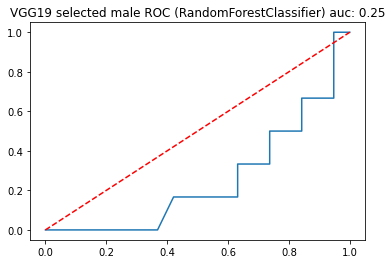

In [368]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected male ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg19_selected_male.png')

In [369]:
df_m_prueba = df_prueba[df_prueba.sex =='M']

In [370]:
model.predict(df_m_prueba.drop(['sex','age','sex_0','sex_1'],axis=1))

array([0, 0])

In [371]:
df_f = df[df.sex == 'F']

In [372]:
X = df_f.drop(['Target','sex','age','sex_0','sex_1'],axis=1)
y = df_f.Target

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [374]:
model = RandomForestClassifier(criterion='gini',n_estimators=350)

In [375]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350)

In [376]:
model_collection.append(('selected vgg19 only female',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [377]:
model.score(X_train,y_train)

1.0

In [378]:
model.score(X_test,y_test)

0.5925925925925926

In [379]:
y_pred = model.predict(X_test)

In [380]:
print((confusion_matrix(y_test,y_pred)))

[[8 5]
 [6 8]]


In [381]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.62      0.57      0.59        14

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.59        27
weighted avg       0.59      0.59      0.59        27



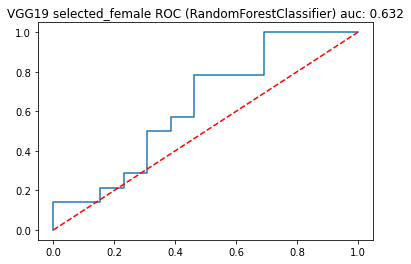

In [382]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')
plt.title(f'VGG19 selected_female ROC (RandomForestClassifier) auc: {round(auc(fpr, tpr),3)}')
plt.savefig('ROC_randomforest_vgg19_selected_female.png')

In [383]:
df_m_prueba = df_prueba[df_prueba.sex =='F']

In [384]:
model.predict(df_m_prueba.drop(['sex','age','sex_0','sex_1'],axis=1))

array([0, 0, 1, 0])

- Xgboost df

In [385]:
from xgboost import XGBClassifier

In [386]:
xmodel = XGBClassifier()

In [387]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,age,sex,Target,sex_0,sex_1,age_bin
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,62,M,0,0,1,4.00


In [388]:
X = df.drop(['age','sex','Target'],axis=1)
y = df.Target

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,shuffle=True)

In [390]:
# Jupyter stops working when trying to fit train to the model
#xmodel.fit(X_train,y_train)

In [391]:
models_df = pd.DataFrame(
    columns= ['name','model','train score','test score'],
    index= range(0,len(model_collection)))

In [392]:
pos = 0
for i in model_collection:
    models_df.loc[pos,'name'] = i[0]
    models_df.loc[pos,'model'] = i[1]
    models_df.loc[pos,'train score'] = i[2]
    models_df.loc[pos,'test score'] = i[3]
    pos += 1

In [393]:
models_df

,name,model,train score,test score
0,original batch,LogisticRegression(),0.54,0.51
1,original batch NuSVC,NuSVC(probability=True),0.99,0.53
2,rotated batch,NuSVC(probability=True),0.97,0.49
3,sex-age original batch,NuSVC(probability=True),0.50,0.51
4,cropped original batch,NuSVC(probability=True),0.56,0.60
5,cropped no sex-age original batch,NuSVC(probability=True),0.96,0.45
6,cropped NO age-sex full row original batch,NuSVC(probability=True),0.96,0.57
7,cropped new batch,NuSVC(probability=True),0.93,0.62
8,cropped NO age-sex new batch,NuSVC(probability=True),0.97,0.48
9,cropped NO age-sex full rows new batch,NuSVC(probability=True),0.96,0.55


In [394]:
import dataframe_image as dfi

In [395]:
df_styled = models_df.style.background_gradient()

In [396]:
dfi.export(df_styled,"Models_table.png")

[0321/105135.899743:INFO:headless_shell.cc(659)] Written to file /var/folders/34/shcpc0k13hndsp05mm2j01th0000gn/T/tmpt6x0e0rm/temp.png.
